In [110]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy.linalg as lin
import copy
%matplotlib inline

### Projection of x onto the subspace V (Proj v X)
##### proj(V) x = A(A^T.A)^-1.A^T.x

In [3]:
# define V and x
x_multiplier = np.arange(-20, 20)
V = np.array([2, 1])
x = np.array([2, 3])

In [4]:
soa =np.array( [ [0,0,3,2], [0,0,1,1],[0,0,9,9]])
a,b,c,d=zip(*soa)
print(a,b,c,d)

(0, 0, 0) (0, 0, 0) (3, 1, 9) (2, 1, 9)


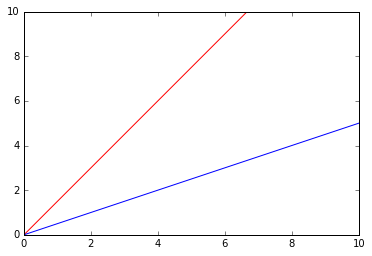

In [5]:
# visualize V and x
fig, ax = plt.subplots()
ax.plot(x[0]*x_multiplier, x[1]*x_multiplier, 'r-', V[0]*x_multiplier, V[1]*x_multiplier)
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
plt.show()

C[d]B - [d]
C = [[v1, v2, v3...]]
[d]B = co-ordinates [[w1, w2, w3...]]
[d] = vector d
basically Ax = b

## Alternate Co-ordinate systems

In [44]:
l = np.array([1, 2])
v1 = np.array([1, 2])
v2 = np.array([2, -1])
l_range = np.arange(-4, 4)
v1_range = np.arange(0, 3)
v2_range = np.arange(0, 3)

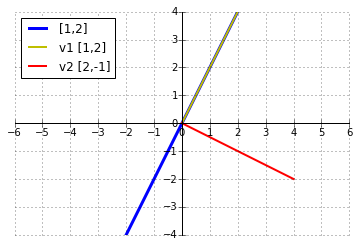

In [87]:
fig, ax = plt.subplots()
ax.plot(l[0]*l_range, l[1]*l_range, 'b-', label='[1,2]', linewidth=3)
ax.plot(v1[0]*v1_range, v1[1]*v1_range, 'y-', label='v1 [1,2]', linewidth=2)
ax.plot(v2[0]*v2_range, v2[1]*v2_range, 'r-', label='v2 [2,-1]', linewidth=2)
ax.spines['top'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_position('zero')
ax.set_xticks(np.arange(-10,10))
ax.set_yticks(np.arange(-10,10))
ax.legend(loc='upper left')
ax.axis('equal')
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
plt.grid()
plt.show()

In [139]:
class transform_from_line(object):
    '''
    R2 Transformation around line using alternate bases
    '''
    # vector_in = [2, -1]
    # vector_out = [-2, 1]
    # line = [1, 2]
    # C should be transformation_line and vector orthogonal to transformation line
    def __init__(self, vector_in, transformation_line):
        self.vector_in = vector_in
        self.transformation_line = transformation_line
        self.calculate_C()
        self.calculate_D()
    
    def calculate_C(self):
        self.orth_line = self.calculate_orthogonal(self.transformation_line)
        self.C = np.matrix([self.transformation_line, self.orth_line])
        
    def calculate_D(self):
        
        
    def calculate_orthogonal(self, np_array):
        return np.array([np_array[1], -np_array[0]])

In [142]:
a=transform_from_line(np.array([1,1]), np.array([2,1]))
a.C

matrix([[ 2,  1],
        [ 1, -2]])

In [103]:
v2_2 = np.dot(D, np.array([0,1]))
np.dot([0, 1], lin.inv(C))

matrix([[ 0.4, -0.2]])

### Calculating A where $Ax = T(x)$ and D where $D[x]_B = [T(x)]_B$

In [104]:
# C is the basis for D
C = np.matrix([[1,2],[2,-1]])
reflect_line = np.array([1,2])
v1_b = [1, 0]
v2_b = [0, 1]
v1_b_transform = [1, 0]
v2_b_transform = [0, -1]
# Calculate D
D = np.matrix([v1_b_transform, v2_b_transform])

In [105]:
# A = CDC^-1
A = np.dot(np.dot(C, D), lin.inv(C))

In [91]:
np.dot(D, np.array([2, 0]))

matrix([[2, 0]])

### Transforming $[T(x)]_B$ back to $T(x)$

In [107]:
# Transforming [T(a)] back to T(a)
def transform_to_standard_basis(C, Tx_B):
    return np.dot(Tx_B, lin.inv(C))